## Section: 8 Excercise: 1 (LSTMs)

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image 

from pandas.tseries.offsets import MonthEnd
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, LSTM
import keras.backend as K
from keras.callbacks import EarlyStopping

In [2]:
df = pd.read_csv('../../data/raw/Udemy_Zero_to_deep_learning_Mosconi/cansim-0800020-eng-6674700030567901031.csv',
                   skiprows=6, skipfooter=9, engine='python')

In [3]:
df.head()

,Adjustments,Unadjusted,Seasonally adjusted
0,Jan-1991,12588862,15026890
1,Feb-1991,12154321,15304585
2,Mar-1991,14337072,15413591
3,Apr-1991,15108570,15293409
4,May-1991,17225734,15676083


In [6]:
df['Adjustments'] = pd.to_datetime(df.Adjustments) + MonthEnd(1)

In [7]:
df.head()

,Adjustments,Unadjusted,Seasonally adjusted
0,1991-01-31,12588862,15026890
1,1991-02-28,12154321,15304585
2,1991-03-31,14337072,15413591
3,1991-04-30,15108570,15293409
4,1991-05-31,17225734,15676083


In [11]:
df = df.set_index('Adjustments')
df.head()

,Unadjusted,Seasonally adjusted
Adjustments,,
1991-01-31,12588862,15026890
1991-02-28,12154321,15304585
1991-03-31,14337072,15413591
1991-04-30,15108570,15293409
1991-05-31,17225734,15676083


In [18]:
split_date = pd.Timestamp('01/01/2011')
split_date

Timestamp('2011-01-01 00:00:00')

In [21]:
len(df[df.index > split_date])

73

In [22]:
len(df[df.index < split_date])

240

In [20]:
df.count()

Unadjusted             313
Seasonally adjusted    313
dtype: int64

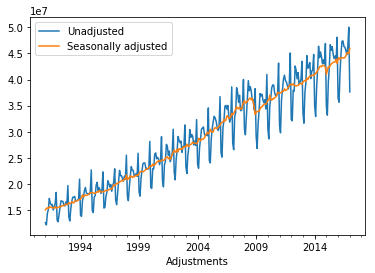

In [23]:
df.plot()

In [33]:
train = df[:split_date][['Unadjusted']]
test = df[split_date:][['Unadjusted']]

In [37]:
print(train.count(), '\n', test.count())

Unadjusted    240
dtype: int64 
 Unadjusted    73
dtype: int64


In [43]:
train.columns

Index(['Unadjusted'], dtype='object')

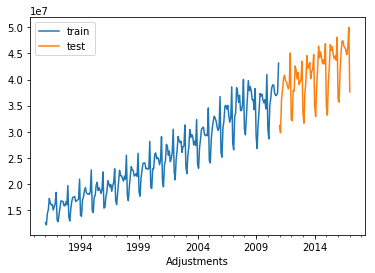

In [52]:
ax = train.plot()
test.plot(ax=ax)
ax.legend(['train', 'test'])

In [46]:
scaler = MinMaxScaler() 
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [117]:
len(train_scaled), len(test_scaled)

(240, 73)

In [47]:
train_scaled[:5]

array([[0.01402033],
       [0.        ],
       [0.0704258 ],
       [0.09531795],
       [0.16362761]])

In [48]:
test_scaled[:5]

array([[0.61423187],
       [0.56926634],
       [0.77259579],
       [0.83505683],
       [0.89993326]])

In [59]:
trainDF = pd.DataFrame(train_scaled, columns=['scaled'], index=train.index)
testDF = pd.DataFrame(test_scaled, columns=['scaled'], index=test.index)
trainDF.head()

,scaled
Adjustments,
1991-01-31,0.014020
1991-02-28,0.000000
1991-03-31,0.070426
1991-04-30,0.095318
1991-05-31,0.163628


In [68]:
for s in range(1,13):
    trainDF['scaled_{}'.format(s)] = trainDF.scaled.shift(s)
    testDF['scaled_{}'.format(s)] = testDF.scaled.shift(s)

In [69]:
trainDF.head()

,scaled,scaled_1,scaled_2,scaled_3,scaled_4,scaled_5,scaled_6,scaled_7,scaled_8,scaled_9,scaled_10,scaled_11,scaled_12
Adjustments,,,,,,,,,,,,,
1991-01-31,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-02-28,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-03-31,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-04-30,0.095318,0.070426,0.000000,0.01402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-05-31,0.163628,0.095318,0.070426,0.00000,0.01402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
testDF.head()

,scaled,scaled_1,scaled_2,scaled_3,scaled_4,scaled_5,scaled_6,scaled_7,scaled_8,scaled_9,scaled_10,scaled_11,scaled_12
Adjustments,,,,,,,,,,,,,
2011-01-31,0.614232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-28,0.569266,0.614232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-03-31,0.772596,0.569266,0.614232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-04-30,0.835057,0.772596,0.569266,0.614232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-05-31,0.899933,0.835057,0.772596,0.569266,0.614232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
X_train = trainDF.dropna().drop('scaled',axis=1)
y_train = trainDF.dropna()[['scaled']]

X_test = testDF.dropna().drop('scaled',axis=1)
y_test = testDF.dropna()[['scaled']]

In [121]:
y_test.count()

scaled    61
dtype: int64

In [122]:
X_train.head()

,scaled_1,scaled_2,scaled_3,scaled_4,scaled_5,scaled_6,scaled_7,scaled_8,scaled_9,scaled_10,scaled_11,scaled_12
Adjustments,,,,,,,,,,,,
1992-01-31,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020
1992-02-29,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000
1992-03-31,0.019993,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426
1992-04-30,0.065964,0.019993,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318
1992-05-31,0.109831,0.065964,0.019993,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628


In [123]:
y_train.head()

,scaled
Adjustments,
1992-01-31,0.030027
1992-02-29,0.019993
1992-03-31,0.065964
1992-04-30,0.109831
1992-05-31,0.149130


In [124]:
X_train_array = X_train.values
y_train_array = y_train.values
X_test_array = X_test.values
y_test_array = y_test.values

In [125]:
X_train_array.shape, y_train_array.shape

((228, 12), (228, 1))

In [126]:
X_test_array.shape, y_test_array.shape

((61, 12), (61, 1))

In [127]:
X_train_3DTensor = X_train_array.reshape(X_train_array.shape[0], 12, 1)
X_test_3DTensor = X_test_array.reshape(X_test_array.shape[0], 12, 1)

In [128]:
X_train_3DTensor.shape, X_test_3DTensor.shape

((228, 12, 1), (61, 12, 1))

In [129]:
early_stopping = EarlyStopping(monitor='loss', patience=1)

In [130]:
K.clear_session()
model = Sequential()
model.add(LSTM(12, input_shape=(12,1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 12)                672       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 13        
Total params: 685
Trainable params: 685
Non-trainable params: 0
_________________________________________________________________


In [131]:
model.fit(X_train_3DTensor, y_train_array, epochs=200, batch_size=1, 
          verbose=1, callbacks=[early_stopping])

Epoch 1/200
228/228 [==============================] - 12s 54ms/step - loss: 0.0387
Epoch 2/200
228/228 [==============================] - 7s 31ms/step - loss: 0.0080
Epoch 3/200
228/228 [==============================] - 8s 36ms/step - loss: 0.0077
Epoch 4/200
228/228 [==============================] - 8s 36ms/step - loss: 0.0073
Epoch 5/200
228/228 [==============================] - 9s 38ms/step - loss: 0.0074


In [132]:
y_pred = model.predict(X_test_3DTensor)

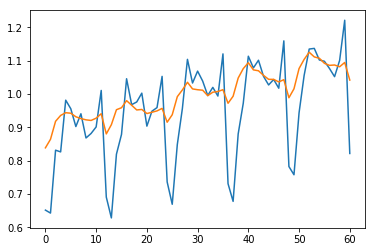

In [136]:
plt.plot(y_test_array)
plt.plot(y_pred)
#plt.legend(['y_test_array', 'y_pred'])

In [137]:
result = model.evaluate(X_test_3DTensor, y_test_array) 
print(result)

61/61 [==============================] - 0s 294us/step
0.013599265733214676


In [140]:
# Iteration 2: Removed callback, batch_size=32, epochs=600
model.fit(X_train_3DTensor, y_train_array, epochs=600, batch_size=32, 
          verbose=0)

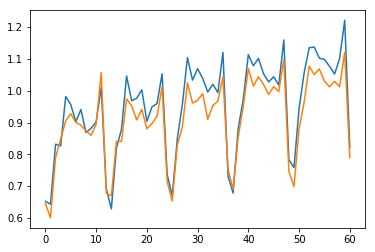

In [141]:
y_pred = model.predict(X_test_3DTensor)
plt.plot(y_test_array)
plt.plot(y_pred)

In [144]:
X_test.tail()

,scaled_1,scaled_2,scaled_3,scaled_4,scaled_5,scaled_6,scaled_7,scaled_8,scaled_9,scaled_10,scaled_11,scaled_12
Adjustments,,,,,,,,,,,,
2016-09-30,1.098520,1.102388,1.137163,1.135161,1.055935,0.943724,0.758063,0.782767,1.159706,1.017693,1.043874,1.027479
2016-10-31,1.076814,1.098520,1.102388,1.137163,1.135161,1.055935,0.943724,0.758063,0.782767,1.159706,1.017693,1.043874
2016-11-30,1.052339,1.076814,1.098520,1.102388,1.137163,1.135161,1.055935,0.943724,0.758063,0.782767,1.159706,1.017693
2016-12-31,1.101218,1.052339,1.076814,1.098520,1.102388,1.137163,1.135161,1.055935,0.943724,0.758063,0.782767,1.159706
2017-01-31,1.221600,1.101218,1.052339,1.076814,1.098520,1.102388,1.137163,1.135161,1.055935,0.943724,0.758063,0.782767


In [ ]:
# CONCLUSION: LSTM performs amazingly well on sequences, but takes long time to train

## TO DO: Section: 8 Excercise: 2 